In [3]:
pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import joblib
import os


from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score,roc_curve, precision_recall_curve, average_precision_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

data = pd.read_csv('/content/drive/MyDrive/capstone/data/credit_card_fraud.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

In [8]:
data.head(20)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
5,2019-01-01 00:22:06,Kunze Inc,grocery_pos,90.22,Honokaa,HI,20.0827,-155.4880,4878,Physiotherapist,1966-12-03,95826e3caa9e0b905294c6dae985aec1,19.560013,-156.045889,0
6,2019-01-01 00:22:18,"Nitzsche, Kessler and Wol",shopping_pos,4.02,Valentine,NE,42.8062,-100.6215,4005,Network engineer,1945-03-15,20490f3f0966ce74b4aaba8dc2c4ed52,42.475590,-101.265846,0
7,2019-01-01 00:22:36,"Kihn, Abernathy and Douglas",shopping_net,3.66,Westfir,OR,43.7575,-122.4810,597,Forensic psychologist,1961-05-19,870c92b288a974a2faf1f24b05c27e33,44.278191,-121.815161,0
8,2019-01-01 00:31:51,Ledner-Pfannerstill,gas_transport,102.13,Thompson,UT,38.9999,-109.6150,46,"Surveyor, minerals",1987-04-23,47238da5b40d126c8abea40a857c7809,39.807313,-109.348294,0
9,2019-01-01 00:34:10,Stracke-Lemke,grocery_pos,83.07,Conway,WA,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,9b7a0619dcc5c572dc134f2827ed5a6b,48.682111,-122.719904,0


#  Explore Data
RangeIndex: 339607 entries, 0 to 339606

15 columns
*   trans_date_trans_time  -- Transaction date and time  (Data from 2020-12-31 23:59:24 to 2019-01-01 00:00:44
*   merchant - Merchant (693)
*   category - Category (14)
*   amt - Amount (1.0 - 28948.9)  
*   city - City (176)
*   state - State (13)
*   lat - Latitude
*   long - Longitude
*   city_pop - City population ( 46 - 2383912)
*   job - Job (163)
*   dob - Date of birth
*   trans_num - Transaction number
*   merch_lat - Merchant Latitude
*   merch_long - Merchant Longitude
*   is_fraud - Is Fraud (Not fraud - 337825, Fraud - 1782)

data['is_fraud'].unique().size

data['is_fraud'].value_counts()

data['job'].unique()

data['city_pop'].min()

In [9]:
data['is_fraud'].value_counts()

,count
is_fraud,
0,337825
1,1782


# Prepare data :
1. Check for null
2. Chec for duplicates
3. Drop unwanted columns
4. Detect Outliers
5. Extract information from time field
6. Convert data
7. Encode Data
8. Split to test and train data

## Check for null/duplicate data

In [10]:
data.isnull().sum()

,0
trans_date_trans_time,0
merchant,0
category,0
amt,0
city,0
state,0
lat,0
long,0
city_pop,0
job,0


In [11]:
data[data.duplicated()]

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud


## Drop unwanted columns


In [12]:
# Drop transaction column, very unique
data = data.drop('trans_num', axis=1)

In [13]:
# Convert dob to age and drop dob
def calculate_age(dob_str, date_format="%Y-%m-%d"):
    dob = datetime.strptime(dob_str, date_format)
    today = datetime.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

In [14]:
data['age'] = data['dob'].apply(lambda x: calculate_age(x, "%Y-%m-%d"))

In [15]:
data.head(10)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,46
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,63
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,41.657520,-122.230347,0,79
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,32.863258,-106.520205,0,57
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,43.753735,-111.454923,0,57
5,2019-01-01 00:22:06,Kunze Inc,grocery_pos,90.22,Honokaa,HI,20.0827,-155.4880,4878,Physiotherapist,1966-12-03,19.560013,-156.045889,0,58
6,2019-01-01 00:22:18,"Nitzsche, Kessler and Wol",shopping_pos,4.02,Valentine,NE,42.8062,-100.6215,4005,Network engineer,1945-03-15,42.475590,-101.265846,0,80
7,2019-01-01 00:22:36,"Kihn, Abernathy and Douglas",shopping_net,3.66,Westfir,OR,43.7575,-122.4810,597,Forensic psychologist,1961-05-19,44.278191,-121.815161,0,64
8,2019-01-01 00:31:51,Ledner-Pfannerstill,gas_transport,102.13,Thompson,UT,38.9999,-109.6150,46,"Surveyor, minerals",1987-04-23,39.807313,-109.348294,0,38
9,2019-01-01 00:34:10,Stracke-Lemke,grocery_pos,83.07,Conway,WA,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,48.682111,-122.719904,0,40


In [16]:
data = data.drop('dob', axis=1)

## Detect Outliers if any

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  merch_lat              339607 non-null  float64
 11  merch_long             339607 non-null  float64
 12  is_fraud               339607 non-null  int64  
 13  age                    339607 non-null  int64  
dtypes: float64(5), int64(3), object(6)
m

In [18]:
data['amt'].describe()

,amt
count,339607.000000
mean,70.577984
std,161.675242
min,1.000000
25%,9.600000
50%,46.460000
75%,83.350000
max,28948.900000


In [19]:
data[data['amt'] > 15000]
## there seems to be couple trasactions with high amout. Lets keep it for now and reiterate later incase needed.

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age
144783,2019-12-01 16:19:23,Satterfield-Lowe,travel,28948.90,Westerville,NE,41.4193,-99.3844,73,Product designer,42.317313,-99.139498,0,90
283918,2020-09-21 12:02:00,Johnston-Caspe,travel,16837.08,Newhall,CA,34.3795,-118.5230,34882,Health physicist,35.111725,-118.128435,0,54


In [20]:

data['city_pop'].describe()

,city_pop
count,3.396070e+05
mean,1.071409e+05
std,2.930299e+05
min,4.600000e+01
25%,4.710000e+02
50%,1.645000e+03
75%,3.543900e+04
max,2.383912e+06


In [21]:
data['age'].describe()

,age
count,339607.000000
mean,52.670440
std,17.047383
min,23.000000
25%,39.000000
50%,51.000000
75%,63.000000
max,97.000000


## Extract information from time field

In [22]:
# Convert the field to data time
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [23]:
#data['year'] = data['trans_date_trans_time'].dt.year
data['month'] = data['trans_date_trans_time'].dt.month
data['day'] = data['trans_date_trans_time'].dt.day
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek  # Monday=0, Sunday=6
data['hour'] = data['trans_date_trans_time'].dt.hour
data['is_weekend'] = data['trans_date_trans_time'].dt.weekday >= 5

In [24]:
#Drop the trans_date_trans_time column
data = data.drop('trans_date_trans_time', axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   merchant     339607 non-null  object 
 1   category     339607 non-null  object 
 2   amt          339607 non-null  float64
 3   city         339607 non-null  object 
 4   state        339607 non-null  object 
 5   lat          339607 non-null  float64
 6   long         339607 non-null  float64
 7   city_pop     339607 non-null  int64  
 8   job          339607 non-null  object 
 9   merch_lat    339607 non-null  float64
 10  merch_long   339607 non-null  float64
 11  is_fraud     339607 non-null  int64  
 12  age          339607 non-null  int64  
 13  month        339607 non-null  int32  
 14  day          339607 non-null  int32  
 15  day_of_week  339607 non-null  int32  
 16  hour         339607 non-null  int32  
 17  is_weekend   339607 non-null  bool   
dtypes: bool(1), float64(5), 

# Visualize the data

In [26]:
# Calculate the correlation matrix
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,month,day,day_of_week,hour,is_weekend
amt,1.000000,0.002817,-0.007017,0.006050,0.002957,-0.006891,0.201023,-0.011283,-0.001089,0.001306,-0.001238,-0.032631,-0.000798
lat,0.002817,1.000000,-0.151364,-0.236336,0.993646,-0.151267,0.009239,0.161939,-0.003718,-0.000737,0.004584,-0.012251,0.004404
long,-0.007017,-0.151364,1.000000,-0.066080,-0.150385,0.998960,-0.004494,-0.092947,-0.000303,-0.000682,0.000809,0.022051,-0.001799
city_pop,0.006050,-0.236336,-0.066080,1.000000,-0.235019,-0.066052,0.002338,-0.134509,0.000913,0.000343,-0.001141,0.009314,0.005860
merch_lat,0.002957,0.993646,-0.150385,-0.235019,1.000000,-0.150278,0.008848,0.161019,-0.003587,-0.000780,0.004591,-0.011991,0.004621
merch_long,-0.006891,-0.151267,0.998960,-0.066052,-0.150278,1.000000,-0.004550,-0.092687,-0.000206,-0.000676,0.000621,0.021973,-0.001990
is_fraud,0.201023,0.009239,-0.004494,0.002338,0.008848,-0.004550,1.000000,0.013215,-0.017812,0.001108,0.002127,0.012388,-0.000829
age,-0.011283,0.161939,-0.092947,-0.134509,0.161019,-0.092687,0.013215,1.000000,0.000712,0.000697,-0.002616,-0.157723,-0.001584
month,-0.001089,-0.003718,-0.000303,0.000913,-0.003587,-0.000206,-0.017812,0.000712,1.000000,0.010339,-0.003789,-0.002172,0.003525
day,0.001306,-0.000737,-0.000682,0.000343,-0.000780,-0.000676,0.001108,0.000697,0.010339,1.000000,-0.004310,-0.000229,-0.002796


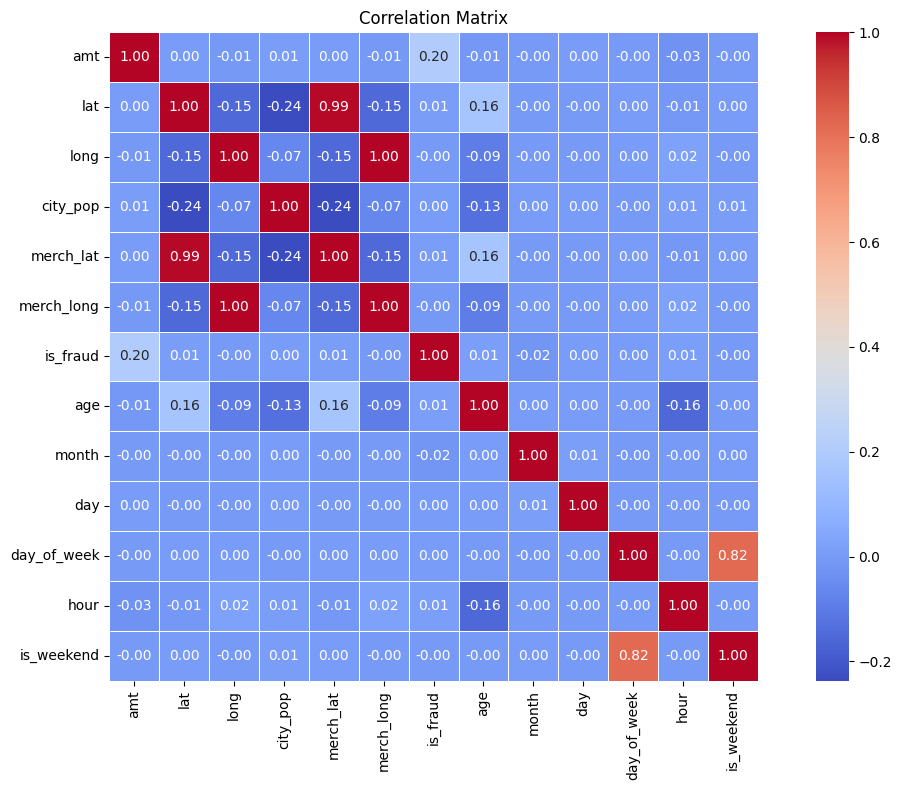

In [27]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(corr_matrix,
            annot=True,         # show correlation values
            fmt='.2f',          # format float to 2 decimal places
            cmap='coolwarm',    # color map: blue = negative, red = positive
            linewidths=0.5,     # lines between squares
            square=True)        # keep squares
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [28]:
# Latitude, Logitude and merchant latitude and logitude are highly correlated.
# We could remove one set. Removing the merchant latitude longitude
data = data.drop('merch_lat', axis=1)
data = data.drop('merch_long', axis=1)

Amount , Age, Month, Hour, Lat seems to have some correlation with is_Fraud.
Lets do some plots.

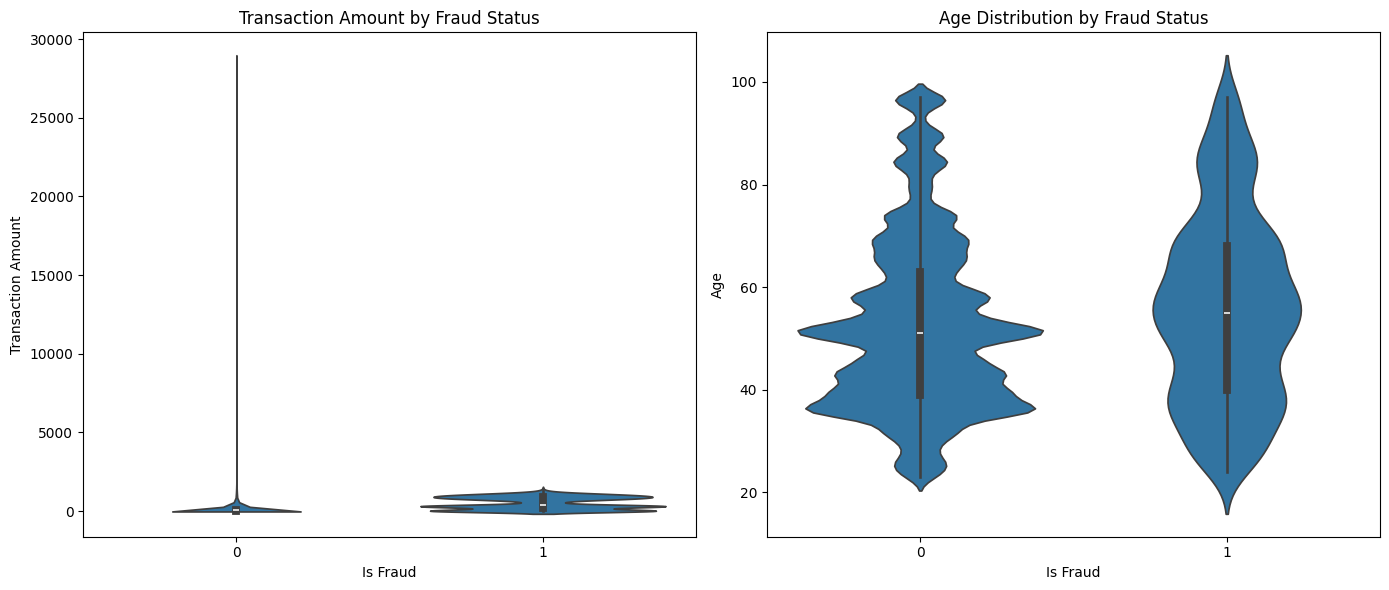

In [29]:
# Transaction Amount # Age
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Transaction Amount distribution by fraud status
sns.violinplot(x='is_fraud', y='amt', data=data, ax=axes[0])
axes[0].set_title('Transaction Amount by Fraud Status')
axes[0].set_xlabel('Is Fraud')
axes[0].set_ylabel('Transaction Amount')

# Age distribution by fraud status
sns.violinplot(x='is_fraud', y='age', data=data, ax=axes[1])
axes[1].set_title('Age Distribution by Fraud Status')
axes[1].set_xlabel('Is Fraud')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

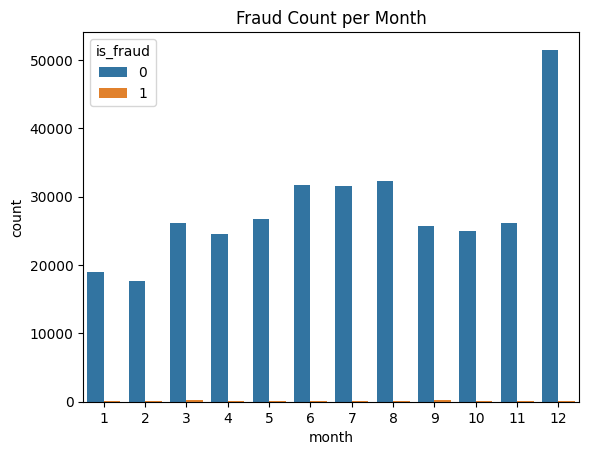

In [30]:
sns.countplot(x='month', hue='is_fraud', data=data)
plt.title('Fraud Count per Month')
plt.show()

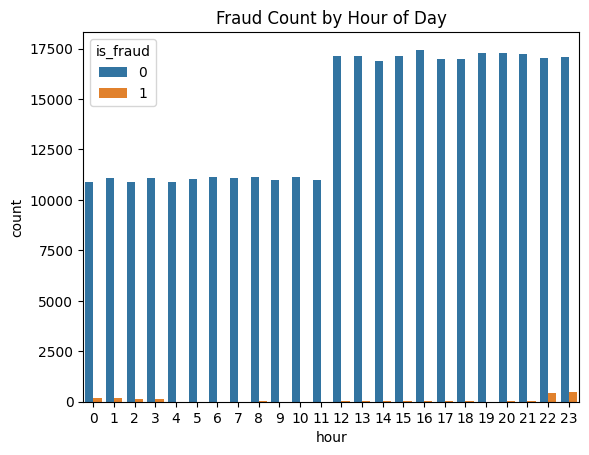

In [31]:
sns.countplot(x='hour', hue='is_fraud', data=data)
plt.title('Fraud Count by Hour of Day')
plt.show()

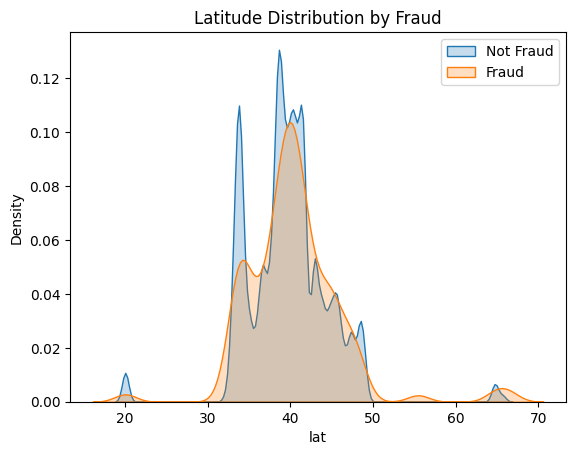

In [32]:
sns.kdeplot(data=data[data['is_fraud'] == 0], x='lat', label='Not Fraud', fill=True)
sns.kdeplot(data=data[data['is_fraud'] == 1], x='lat', label='Fraud', fill=True)
plt.title('Latitude Distribution by Fraud')
plt.legend()
plt.show()

# Here are some inferences :

*   High-value transactions by younger users are more likely to be fraudulent.

*   Higher amount also seems to be a little more plone to fraudulant transactions.

*   Holiday season has more fraudulant transactions.

*   Its also observed that fraudulant transaction occur more in night time.

# Encode Data


*   Merchant (693)
*   Category (14)
*   City (176)
*   State (13)
*   Job (163)
*   Is_weekend (2)



In [33]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   merchant     339607 non-null  object 
 1   category     339607 non-null  object 
 2   amt          339607 non-null  float64
 3   city         339607 non-null  object 
 4   state        339607 non-null  object 
 5   lat          339607 non-null  float64
 6   long         339607 non-null  float64
 7   city_pop     339607 non-null  int64  
 8   job          339607 non-null  object 
 9   is_fraud     339607 non-null  int64  
 10  age          339607 non-null  int64  
 11  month        339607 non-null  int32  
 12  day          339607 non-null  int32  
 13  day_of_week  339607 non-null  int32  
 14  hour         339607 non-null  int32  
 15  is_weekend   339607 non-null  bool   
dtypes: bool(1), float64(3), int32(4), int64(3), object(5)
memory usage: 34.0+ MB


In [34]:
# Define columns based on cardinality
high_card_cols = ['merchant', 'city', 'job']        # target encoding
low_card_cols = ['category', 'state', 'is_weekend'] # one hot encoding
numeric_cols = [col for col in data.columns if col not in high_card_cols + low_card_cols + ['is_fraud']]

# Target Encoder needs the target variable (y) for fitting
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

# Custom transformer for target encoding that works with pipeline
class TargetEncoderWrapper(ce.TargetEncoder):
    def fit(self, X, y=None):
        super().fit(X, y)
        return self
    def transform(self, X, **kwargs): # Add **kwargs here
        return super().transform(X, **kwargs) # Pass kwargs to the superclass transform
    def fit_transform(self, X, y=None):
        # Correct the call to transform to only pass X
        return super().fit(X, y).transform(X)

# Build ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('target_enc', TargetEncoderWrapper(), high_card_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), low_card_cols),
        ('scaler', StandardScaler(), numeric_cols)
    ])

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the pipeline on data with target y for target encoding
X_processed = pipeline.fit_transform(X, y)

In [35]:
# Get processed dataframe
# For OneHotEncoder:
ohe = pipeline.named_steps['preprocessor'].named_transformers_['onehot']
ohe_features = ohe.get_feature_names_out(low_card_cols)

# For TargetEncoder:
# TargetEncoder does not provide get_feature_names_out, so just use the original column names
target_enc_features = high_card_cols

# For StandardScaler numeric columns:
numeric_features = numeric_cols

# Combine all feature names in order of the transformers
all_features = list(target_enc_features) + list(ohe_features) + list(numeric_features)

# 2. Convert X_processed to dense array if it is sparse
if hasattr(X_processed, "toarray"):
    X_processed = X_processed.toarray()

# 3. Create DataFrame
data_processed = pd.DataFrame(X_processed, columns=all_features)
data_processed.head(10)

,merchant,city,job,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,is_weekend_True,amt,lat,long,city_pop,age,month,day,day_of_week,hour
0,0.007299,0.001605,0.001605,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.226702,1.799586,-0.599770,-0.365123,-0.391289,-1.798462,-1.673664,-0.893542,-1.88115
1,0.002075,0.010884,0.021534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.924893,0.483186,-0.129583,-0.351456,0.605933,-1.798462,-1.673664,-0.893542,-1.88115
2,0.013846,0.005914,0.006367,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.159035,0.371644,-0.940864,-0.363622,1.544495,-1.798462,-1.673664,-0.893542,-1.88115
3,0.009983,0.003765,0.006552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.388483,-1.330609,0.379699,-0.362564,0.253973,-1.798462,-1.673664,-0.893542,-1.88115
4,0.002427,0.005125,0.005125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.394173,0.647348,-0.032138,-0.364024,0.253973,-1.798462,-1.673664,-0.893542,-1.88115
5,0.024806,0.006152,0.006152,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.121491,-3.854066,-3.546293,-0.348985,0.312633,-1.798462,-1.673664,-0.893542,-1.88115
6,0.004710,0.016194,0.010850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.411678,0.605935,0.790517,-0.351964,1.603155,-1.798462,-1.673664,-0.893542,-1.88115
7,0.015625,0.016194,0.016194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.413904,0.792649,-0.937322,-0.363594,0.664593,-1.798462,-1.673664,-0.893542,-1.88115
8,0.005755,0.002736,0.003794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.195157,-0.141138,0.079644,-0.365475,-0.860570,-1.798462,-1.673664,-0.893542,-1.88115
9,0.007634,0.002054,0.002054,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.077266,1.692068,-0.926620,-0.365342,-0.743249,-1.798462,-1.673664,-0.893542,-1.88115


In [36]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   merchant                 339607 non-null  float64
 1   city                     339607 non-null  float64
 2   job                      339607 non-null  float64
 3   category_entertainment   339607 non-null  float64
 4   category_food_dining     339607 non-null  float64
 5   category_gas_transport   339607 non-null  float64
 6   category_grocery_net     339607 non-null  float64
 7   category_grocery_pos     339607 non-null  float64
 8   category_health_fitness  339607 non-null  float64
 9   category_home            339607 non-null  float64
 10  category_kids_pets       339607 non-null  float64
 11  category_misc_net        339607 non-null  float64
 12  category_misc_pos        339607 non-null  float64
 13  category_personal_care   339607 non-null  float64
 14  cate

# Split to Test and Train set

In [37]:
# If X_processed is a numpy array, you can proceed directly
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression

In [38]:
model_path = '/content/drive/MyDrive/capstone/dump/best_logistic_regression_model.pkl'
best_lr_model = None

# Check if the model already exists
if os.path.exists(model_path):
    print("Loading existing model from file...")
    best_lr_model = joblib.load(model_path)
else:
    print(" Model not found, training new Logistic Regression model...")

    # Define the parameter grid for tuning
    param_grid = {
        'C': [0.01, 0.1, 1, 10],                  # Regularization strength
        'penalty': ['l1', 'l2'],                  # Type of regularization
        'solver': ['liblinear', 'saga'],          # Solvers that support both l1 and l2
    }

    # Initialize Logistic Regression with base settings
    lr = LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'
    )

    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        estimator=lr,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=5,
        verbose=1,
        n_jobs=-1
    )

    # Fit GridSearchCV on training data
    grid_search.fit(X_train, y_train)

    # Get best estimator
    best_lr_model = grid_search.best_estimator_
    # Save to file
    joblib.dump(best_lr_model, model_path)
    print("Model saved to file.")

# Predict with best model
y_pred = best_lr_model.predict(X_test)
y_proba = best_lr_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Loading existing model from file...

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     67566
           1       0.04      0.78      0.08       356

    accuracy                           0.91     67922
   macro avg       0.52      0.84      0.52     67922
weighted avg       0.99      0.91      0.95     67922

ROC AUC Score: 0.9334236902610747
Confusion Matrix:
 [[61634  5932]
 [   80   276]]


# Random Forest

In [39]:
# Hypertune random forest model and write to pkl file.
model_path = '/content/drive/MyDrive/capstone/dump/best_random_forest_model.pkl'
best_rf_model = None

# Check if the model already exists
if os.path.exists(model_path):
    print("Loading existing model from file...")
    best_rf_model = joblib.load(model_path)
else:
    print(" Model not found, training new Random Forest model...")

    # Define the parameter grid
    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False]
    }
    # Initialize model
    rf = RandomForestClassifier(random_state=42, class_weight='balanced')

    # Randomized Search with Cross-Validation
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=30,  # number of parameter settings sampled
        cv=3,
        verbose=2,
        n_jobs=-1,
        scoring='roc_auc',
        random_state=42
    )
    # Fit
    random_search.fit(X_train, y_train)

    # Best model
    best_rf_model = random_search.best_estimator_
    # Save to file
    joblib.dump(best_rf_model, model_path)
    print("Model saved to file.")

# Predict
y_pred = best_rf_model.predict(X_test)
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Loading existing model from file...
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     67566
           1       0.95      0.75      0.84       356

    accuracy                           1.00     67922
   macro avg       0.98      0.88      0.92     67922
weighted avg       1.00      1.00      1.00     67922

ROC AUC Score: 0.9944779544728135
Confusion Matrix:
 [[67553    13]
 [   88   268]]


# XGBoost

In [40]:
# Path to save/load the model
model_path = '/content/drive/MyDrive/capstone/dump/best_xgboost_model.pkl'
best_xgb_model = None

# Check if model exists
if os.path.exists(model_path):
    print("Loading existing XGBoost model from file...")
    best_xgb_model = joblib.load(model_path)
else:
    print("Model not found, training new XGBoost model...")

    # Compute scale_pos_weight for imbalance handling
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # Define parameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    # Initialize model
    xgb = XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )

    # Grid search for best hyperparameters
    grid_search = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=5,
        verbose=1,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_xgb_model = grid_search.best_estimator_

    # Save the model
    joblib.dump(best_xgb_model, model_path)
    print("Model saved to file.")

# Predict using the best model
y_pred = best_xgb_model.predict(X_test)
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Loading existing XGBoost model from file...

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     67566
           1       0.19      0.03      0.04       356

    accuracy                           0.99     67922
   macro avg       0.59      0.51      0.52     67922
weighted avg       0.99      0.99      0.99     67922

ROC AUC Score: 0.87956912791388
Confusion Matrix:
 [[67528    38]
 [  347     9]]


# Comparing 3 Models

In [41]:
# Dictionary of your trained models
models = {
    'Logistic Regression': best_lr_model,
    'Random Forest': best_rf_model,
    'XGBoost': best_xgb_model
}

# List to store the results
results = []

# Evaluate each model and store metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'F1 Score': f1_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred)
    })

# Create DataFrame
comparison_df = pd.DataFrame(results)

# Sort by ROC AUC or another metric
comparison_df = comparison_df.sort_values(by='ROC AUC', ascending=False)

# Print the table
print("\n🔍 Model Comparison Summary:")
print(comparison_df.to_string(index=False, float_format="%.4f"))


🔍 Model Comparison Summary:
              Model  ROC AUC  F1 Score  Precision  Recall  Accuracy
      Random Forest   0.9945    0.8414     0.9537  0.7528    0.9985
Logistic Regression   0.9334    0.0841     0.0445  0.7753    0.9115
            XGBoost   0.8796    0.0447     0.1915  0.0253    0.9943


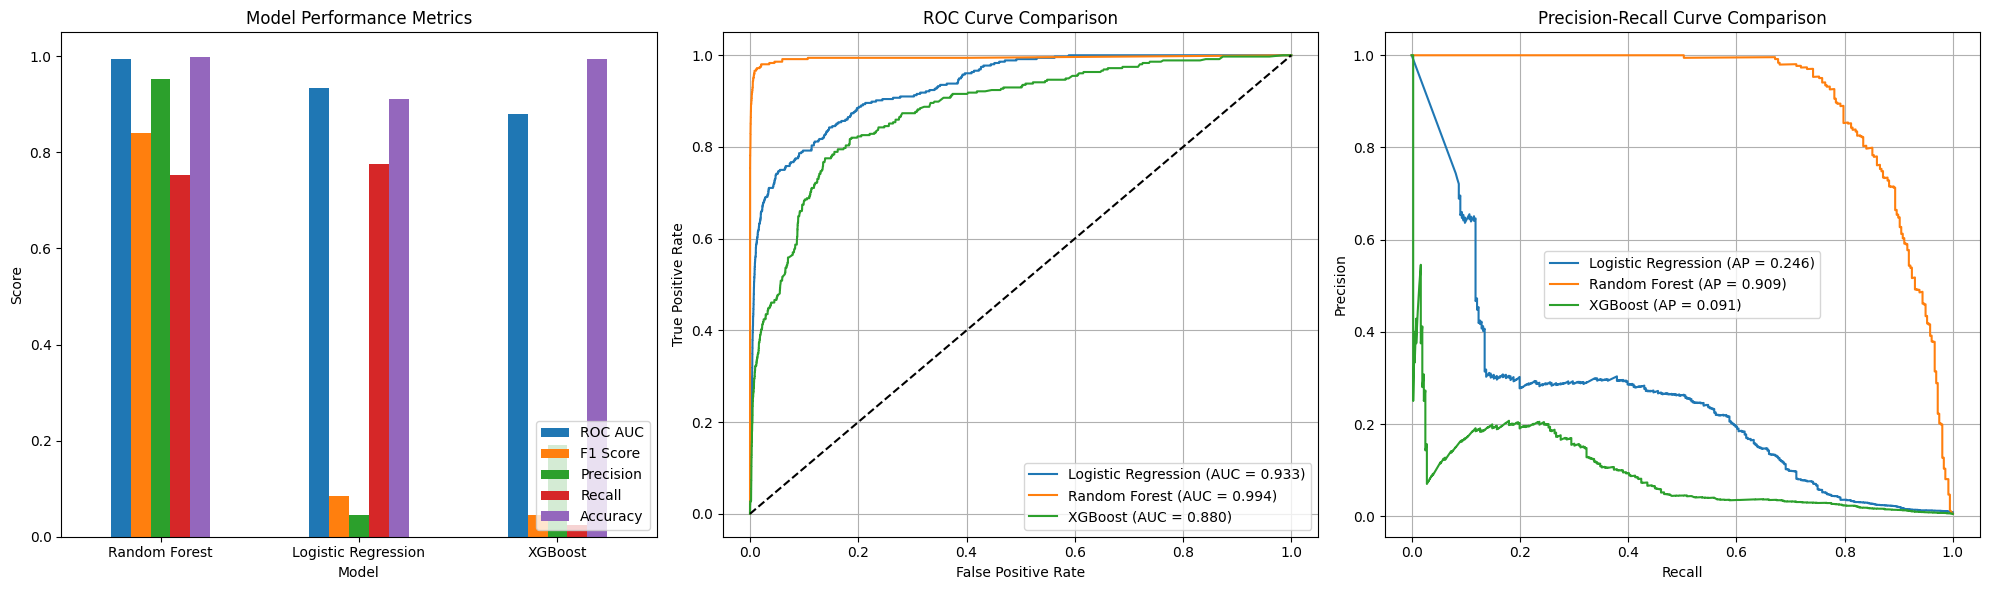

In [42]:
metrics = ['ROC AUC', 'F1 Score', 'Precision', 'Recall', 'Accuracy']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1) Bar plot of metrics
comparison_df.set_index('Model')[metrics].plot(kind='bar', ax=axes[0])
axes[0].set_title("Model Performance Metrics")
axes[0].set_ylim(0, 1.05)
axes[0].set_ylabel("Score")
axes[0].legend(loc='lower right')
axes[0].tick_params(axis='x', rotation=0)

# 2) ROC Curve
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    axes[1].plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.3f})")

axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title("ROC Curve Comparison")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()
axes[1].grid(True)

# 3) Precision-Recall Curve
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap = average_precision_score(y_test, y_proba)
    axes[2].plot(recall, precision, label=f"{name} (AP = {ap:.3f})")

axes[2].set_title("Precision-Recall Curve Comparison")
axes[2].set_xlabel("Recall")
axes[2].set_ylabel("Precision")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Model Comparison Summary
### Best Overall: Random Forest
ROC AUC: 0.9945 (highest)

F1 Score: 0.8414 (strong balance of precision & recall)

Precision: 0.9537 (very few false positives)

Recall: 0.7528 (detects most fraud cases)

Accuracy: 0.9985 (very high overall performance)


**Conclusion:** Random Forest performs exceptionally well, striking a good balance between detecting frauds and minimizing false alarms.